## Basic concepts of Returns

# Return = P(t+1)/P(t) -1

In [105]:
prices_a = [12.2, 13.7, 16.1, 14.9]
# price of stock a at four sequential time periods

In [106]:
prices_a[1:]

[13.7, 16.1, 14.9]

In [107]:
prices_a[:-1]

[12.2, 13.7, 16.1]

# Using Numpy

In [108]:
import numpy as np

In [109]:
prices_a = np.array([12.2, 13.7, 16.1, 14.9])
prices_a

array([12.2, 13.7, 16.1, 14.9])

In [110]:
return_np = prices_a[1:]/prices_a[:-1] -1
return_np

array([ 0.12295082,  0.17518248, -0.07453416])

# Using Pandas (1)

In [111]:
import pandas as pd

In [112]:
prices = pd.DataFrame({'Stock_A':[12.2, 13.7, 16.1, 14.9],
                       'Stock_B':[32.2, 30.1, 37.7, 41.8]
                      })
prices

,Stock_A,Stock_B
0,12.2,32.2
1,13.7,30.1
2,16.1,37.7
3,14.9,41.8


In [113]:
prices.iloc[1:].values
# Considers the value of each element in DataFrame ignoring the first index

array([[13.7, 30.1],
       [16.1, 37.7],
       [14.9, 41.8]])

In [114]:
return_pd1 = prices.iloc[1:].values/prices.iloc[:-1].values -1
return_pd1

array([[ 0.12295082, -0.06521739],
       [ 0.17518248,  0.25249169],
       [-0.07453416,  0.10875332]])

# Pandas (2)

In [115]:
prices.shift(1)
# Shifts data down in index direction

,Stock_A,Stock_B
0,NaN,NaN
1,12.2,32.2
2,13.7,30.1
3,16.1,37.7


In [116]:
return_pd2 = prices/prices.shift(1) -1
return_pd2

,Stock_A,Stock_B
0,NaN,NaN
1,0.122951,-0.065217
2,0.175182,0.252492
3,-0.074534,0.108753


# Pandas (3)

In [117]:
return_pd3 = prices.pct_change()
# Calculates the percentage change of eache index regarding the previous one
return_pd3

,Stock_A,Stock_B
0,NaN,NaN
1,0.122951,-0.065217
2,0.175182,0.252492
3,-0.074534,0.108753


# Example

In [118]:
prices_AAPLAMZN =pd.read_csv('MyOwn/AAPL.csv')
# Daily prices of two stock (Apple and Amazon) in the past year (4/29/2020 to 4/29/2021)
prices_AAPLAMZN

,AAPL,AMZN
0,71.932503,2372.709961
1,73.449997,2474.000000
2,72.267502,2286.040039
3,73.290001,2315.989990
4,74.389999,2317.800049
...,...,...
248,134.320007,3340.879883
249,134.720001,3409.000000
250,134.389999,3417.429932
251,133.580002,3458.500000


In [119]:
returns = prices_AAPLAMZN.pct_change()
returns

,AAPL,AMZN
0,NaN,NaN
1,0.021096,0.042690
2,-0.016099,-0.075974
3,0.014149,0.013101
4,0.015009,0.000782
...,...,...
248,0.018039,0.009622
249,0.002978,0.020390
250,-0.002450,0.002473
251,-0.006027,0.012018


<AxesSubplot:>

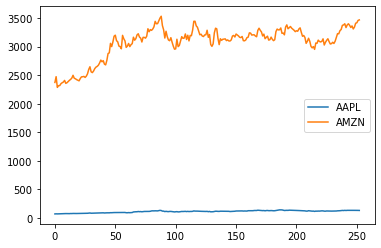

In [120]:
prices_AAPLAMZN.plot()

<AxesSubplot:>

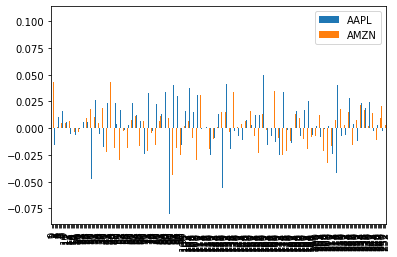

In [121]:
returns.plot.bar()

In [122]:
returns.head()

,AAPL,AMZN
0,NaN,NaN
1,0.021096,0.042690
2,-0.016099,-0.075974
3,0.014149,0.013101
4,0.015009,0.000782


In [123]:
returns.std()

AAPL    0.022033
AMZN    0.020379
dtype: float64

In [124]:
returns.mean()

AAPL    0.002677
AMZN    0.001713
dtype: float64

In [125]:
comp_return = np.prod(returns+1)-1 # (returns+1).prod()-1
# Calculates the compounded return of each column
comp_return

AAPL    0.846036
AMZN    0.461297
dtype: float64

In [126]:
((np.prod(returns+1)-1)*100).round(2)

AAPL    84.60
AMZN    46.13
dtype: float64

In [127]:
# As we can see, the AAPL has an annual return of 84 percent while the AMZN stock has a return of almost half of AAPL's.